In [31]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
import pandas as pd
sns.set_theme(style="darkgrid")

In [27]:
# Open the pickle file in read mode and load the object from it
with open("results/experiment_result2.pickle", "rb") as f:
    my_loaded_object = pickle.load(f)

# Print the loaded object
# print(my_loaded_object['fidelity_history'])
mean_fidelity = [np.mean(fidelity) for fidelity in my_loaded_object['fidelity_history']]
mean_cost = [np.mean(cost) for cost in my_loaded_object['cost_history']]

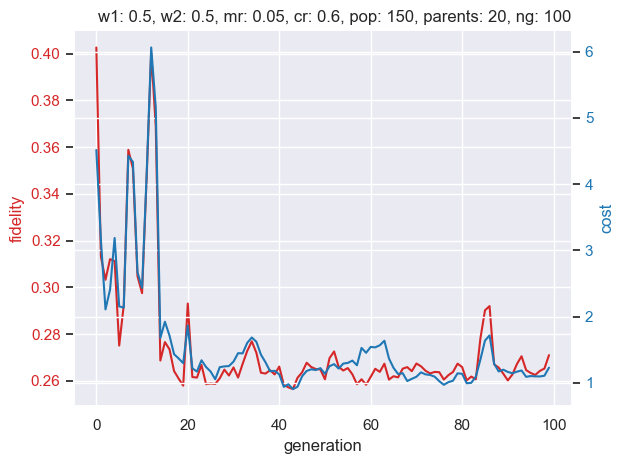

In [41]:
fig, ax1 = plt.subplots()
x = np.arange(0, 100, 1)

w1 = my_loaded_object['Hyperparameter']['w1']
w2 = my_loaded_object['Hyperparameter']['w2']
mutation_rate = my_loaded_object['Hyperparameter']['mutation_rate']
crossover_rate = my_loaded_object['Hyperparameter']['crossover_rate']
num_population = my_loaded_object['Hyperparameter']['num_population']
num_parents = my_loaded_object['Hyperparameter']['num_parents']
num_generation = my_loaded_object['Hyperparameter']['num_generation']

plt.title(f'w1: {w1}, w2: {w2}, mr: {mutation_rate}, cr: {crossover_rate}, pop: {num_population}, parents: {num_parents}, ng: {num_generation}', loc='right')

color = 'tab:red'
ax1.set_xlabel('generation')
ax1.set_ylabel('fidelity', color=color)
ax1.plot(x, mean_fidelity, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('cost', color=color)  # we already handled the x-label with ax1
ax2.plot(x, mean_cost, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [9]:
# Open the pickle file in read mode and load the object from it
with open("results/exp_HyperTune.pickle", "rb") as f:
    my_loaded_object = pickle.load(f)

# Print the loaded object
# print(my_loaded_object['fidelity_history'])
mean_fidelity = [np.mean(fidelity) for fidelity in my_loaded_object['fidelity_history']]
mean_cost = [np.mean(cost) for cost in my_loaded_object['cost_history']]

In [20]:
test = [1.12, 2.34, 5.67, 0.43]
new = []

for i in test:
    new_value = round(i, 1)
    new.append(new_value)

print(new)

[1.1, 2.3, 5.7, 0.4]


In [55]:
round_fidelity = []

for fidelity in my_loaded_object['fidelity_history'][0]:
    new_fidelity = round(fidelity, 3)
    round_fidelity.append(new_fidelity)

print(round_fidelity)

[0.639, 0.332, 0.254, 0.412, 0.268, 0.256, 0.278, 0.584, 0.523, 0.313, 0.292, 0.244, 0.267, 0.264, 0.254, 0.611, 0.448, 0.44, 0.273, 0.359, 0.31, 0.391, 0.271, 0.264, 0.256, 0.271, 0.721, 0.254, 0.365, 0.497, 0.628, 0.286, 0.267, 0.39, 0.483, 0.391, 0.338, 0.548, 0.362, 0.296, 0.273, 0.512, 0.643, 0.536, 0.611, 0.671, 0.331, 0.438, 0.373, 0.586, 0.258, 0.277, 0.413, 0.285, 0.54, 0.398, 0.25, 0.308, 0.332, 0.51, 0.293, 0.335, 0.32, 0.674, 0.612, 0.268, 0.26, 0.29, 0.277, 0.304, 0.586, 0.465, 0.296, 0.252, 0.324, 0.315, 0.447, 0.316, 0.24, 0.461, 0.484, 0.332, 0.275, 0.672, 0.409, 0.395, 0.751, 0.589, 0.772, 0.433, 0.758, 0.401, 0.292, 0.321, 0.513, 0.482, 0.273, 0.291, 0.466, 0.256, 0.266, 0.268, 0.682, 0.575, 0.38, 0.569, 0.324, 0.413, 0.696, 0.257, 0.427, 0.254, 0.304, 0.597, 0.769, 0.252, 0.275, 0.282, 0.466, 0.51, 0.597, 0.601, 0.433, 0.463, 0.256, 0.636, 0.574, 0.436, 0.264, 0.253, 0.254, 0.42, 0.347, 0.7, 0.27, 0.361, 0.508, 0.628, 0.515, 0.455, 0.594, 0.256, 0.29, 0.462, 0.251, 0

In [57]:
print(max(set(round_fidelity), key=round_fidelity.count))

count = 0
for i in round_fidelity:
    if i == max(set(round_fidelity), key=round_fidelity.count):
        count+=1
print(count)

0.254
5


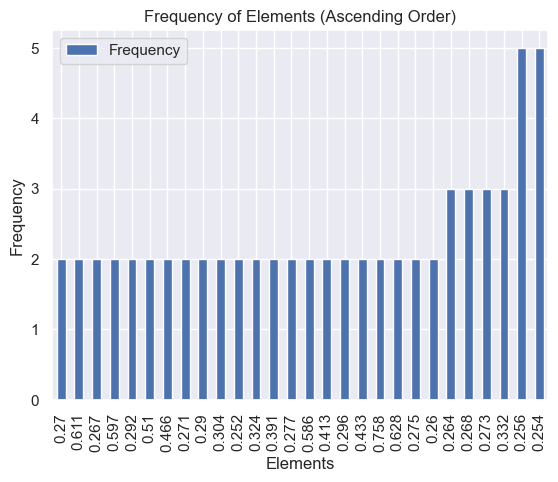

In [54]:
frequency_threshold = 2

count = Counter(round_fidelity)
df = pd.DataFrame.from_dict(count, orient='index').reset_index()
df = df.rename(columns={'index': 'Element', 0: 'Frequency'})
df = df.sort_values('Frequency', ascending=True)

df = df[df['Frequency'] >= frequency_threshold]

df.plot(kind='bar', x='Element', y='Frequency')
plt.xlabel('Elements')
plt.ylabel('Frequency')
plt.title('Frequency of Elements (Ascending Order)')
plt.show()

In [76]:
print(f'Number of generation {len(my_loaded_object["fidelity_history"])} ')
print(f'Number of individual in 1st generation {len(my_loaded_object["fidelity_history"][0])}')

mean_dum =  [np.mean(fidelity) for fidelity in my_loaded_object['fidelity_history']]
max_dum = [np.max(fidelity) for fidelity in my_loaded_object['fidelity_history']]

mean_first_gen = np.mean(my_loaded_object['fidelity_history'][0])
max_first_gen = np.max(my_loaded_object['fidelity_history'][0])

print(max_dum[0], max_first_gen)
print(len(max_dum))

# my_loaded_object['fidelity_history'] # (150x100)

# len(np.max(my_loaded_object['fidelity_history'], axis=0))

Number of generation 100 
Number of individual in 1st generation 150
0.772 0.772
100


In [61]:
print(len(np.max(my_loaded_object['fidelity_history'], axis=0)))
print(len(np.max(my_loaded_object['fidelity_history'], axis=1)))

150
100


In [106]:
def read_pickle(fileName, plotFC=False, plotF=False, plotC=False):
    with open(fileName, "rb") as f:
        my_loaded_object = pickle.load(f)
    
    x = np.arange(0, my_loaded_object['Hyperparameters']['num_generation'], 1)
    w1 = my_loaded_object['Hyperparameters']['w1']
    w2 = my_loaded_object['Hyperparameters']['w2']
    mutation_rate = my_loaded_object['Hyperparameters']['mutation_rate']
    crossover_rate = my_loaded_object['Hyperparameters']['crossover_rate']
    num_population = my_loaded_object['Hyperparameters']['num_population']
    num_parents = my_loaded_object['Hyperparameters']['num_parents']
    num_generation = my_loaded_object['Hyperparameters']['num_generation']
    # fidelity = my_loaded_object['fidelity_history']
    # cost = my_loaded_object['cost_history']

    mean_fidelity = [np.mean(fidelity) for fidelity in my_loaded_object['fidelity_history']]
    mean_cost = [np.mean(cost) for cost in my_loaded_object['cost_history']]

    round_fidelity = []
    for fidelity in my_loaded_object['fidelity_history'][0]:
        new_fidelity = round(fidelity, 3)
        round_fidelity.append(new_fidelity)
        
    mode_fidelity = [max(set(round_fidelity), key=round_fidelity.count) for round_fidelity in my_loaded_object['fidelity_history']]

    fig, ax = plt.subplots(2, 2, figsize=(15, 10))

    if plotFC == True:                
        ax[0, 0].set_title(f'w1: {w1}, w2: {w2}, mr: {mutation_rate}, cr: {crossover_rate}, pop: {num_population}, parents: {num_parents}, ng: {num_generation}', loc='right')

        color = 'tab:red'
        ax[0, 0].set_xlabel('generation')
        ax[0, 0].set_ylabel('fidelity', color=color)
        ax[0, 0].plot(x, mean_fidelity, color=color)
        ax[0, 0].tick_params(axis='y', labelcolor=color)

        ax2 = ax[0, 0].twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('cost', color=color)  # we already handled the x-label with ax1
        ax2.plot(x, mean_cost, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped

        ax[0, 1].plot(my_loaded_object['fidelity_history'][0], my_loaded_object['cost_history'][0], '.')
        ax[0, 1].set_xlabel('fidelity')
        ax[0, 1].set_ylabel('cost')

    if plotF == True:
        ax[1, 0].set_title('Fidelity of each generation')
        ax[1, 0].set_xlabel('generation')
        ax[1, 0].set_ylabel('fidelity')
        ax[1, 0].plot(x, np.max(my_loaded_object['fidelity_history'], axis=1), label='max fidelity', color='tab:red')
        ax[1, 0].plot(x, np.min(my_loaded_object['fidelity_history'], axis=1), label='min fidelity', color='tab:green')
        ax[1, 0].plot(x, np.mean(my_loaded_object['fidelity_history'], axis=1), label='mean fidelity', color='tab:blue')
        ax[1, 0].plot(x, mode_fidelity, label='mode fidelity', color='tab:orange')
        ax[1, 0].fill_between(x, np.max(my_loaded_object['fidelity_history'], axis=1), np.min(my_loaded_object['fidelity_history'], axis=1), alpha=0.2, label='range fidelity')
        ax[1, 0].legend()
        

    if plotC == True:
        # ax[1, 1].set_title('Cost of each generation')
        # ax[1, 1].set_xlabel('generation')
        # ax[1, 1].set_ylabel('cost')
        # # ax[1, 1].plot(x, np.max(my_loaded_object['cost_history'], axis=1), label='max cost', color='tab:red')
        # ax[1, 1].plot(x, np.min(my_loaded_object['cost_history'], axis=1), label='min cost', color='tab:green')
        # ax[1, 1].plot(x, np.mean(my_loaded_object['cost_history'], axis=1), label='mean cost', color='tab:blue')
        # # ax[1, 1].fill_between(x, np.max(my_loaded_object['cost_history'], axis=1), np.min(my_loaded_object['cost_history'], axis=1), alpha=0.2, label='range cost')
        # ax[1, 1].legend()

        ax[1, 1].set_title('Evolution of cost')

        color = 'tab:red'
        ax[1, 1].set_xlabel('generation')
        ax[1, 1].set_ylabel('avg cost', color=color)
        ax[1, 1].plot(x, np.mean(my_loaded_object['cost_history'], axis=1), 'r.-', label='mean cost', color=color)
        ax[1, 1].tick_params(axis='y', labelcolor=color)

        ax2 = ax[1, 1].twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('best cost', color=color)  # we already handled the x-label with ax1
        ax[1, 1].plot(x, np.min(my_loaded_object['cost_history'], axis=1), 'b+',label='min cost', color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        ax[1, 1].legend()
        
        

    # if plotDot == True:
        
    #     plt.plot(my_loaded_object['fidelity_history'][0], my_loaded_object['cost_history'][0], '.')
    #     plt.xlabel('fidelity')
    #     plt.ylabel('cost')
        

/var/folders/b7/kcj1zfy15d35hgd16vscfs0r0000gn/T/ipykernel_46545/1395116077.py:77: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  ax[1, 1].plot(x, np.mean(my_loaded_object['cost_history'], axis=1), 'r.-', label='mean cost', color=color)
/var/folders/b7/kcj1zfy15d35hgd16vscfs0r0000gn/T/ipykernel_46545/1395116077.py:84: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b+" (-> color='b'). The keyword argument will take precedence.
  ax[1, 1].plot(x, np.min(my_loaded_object['cost_history'], axis=1), 'b+',label='min cost', color=color)


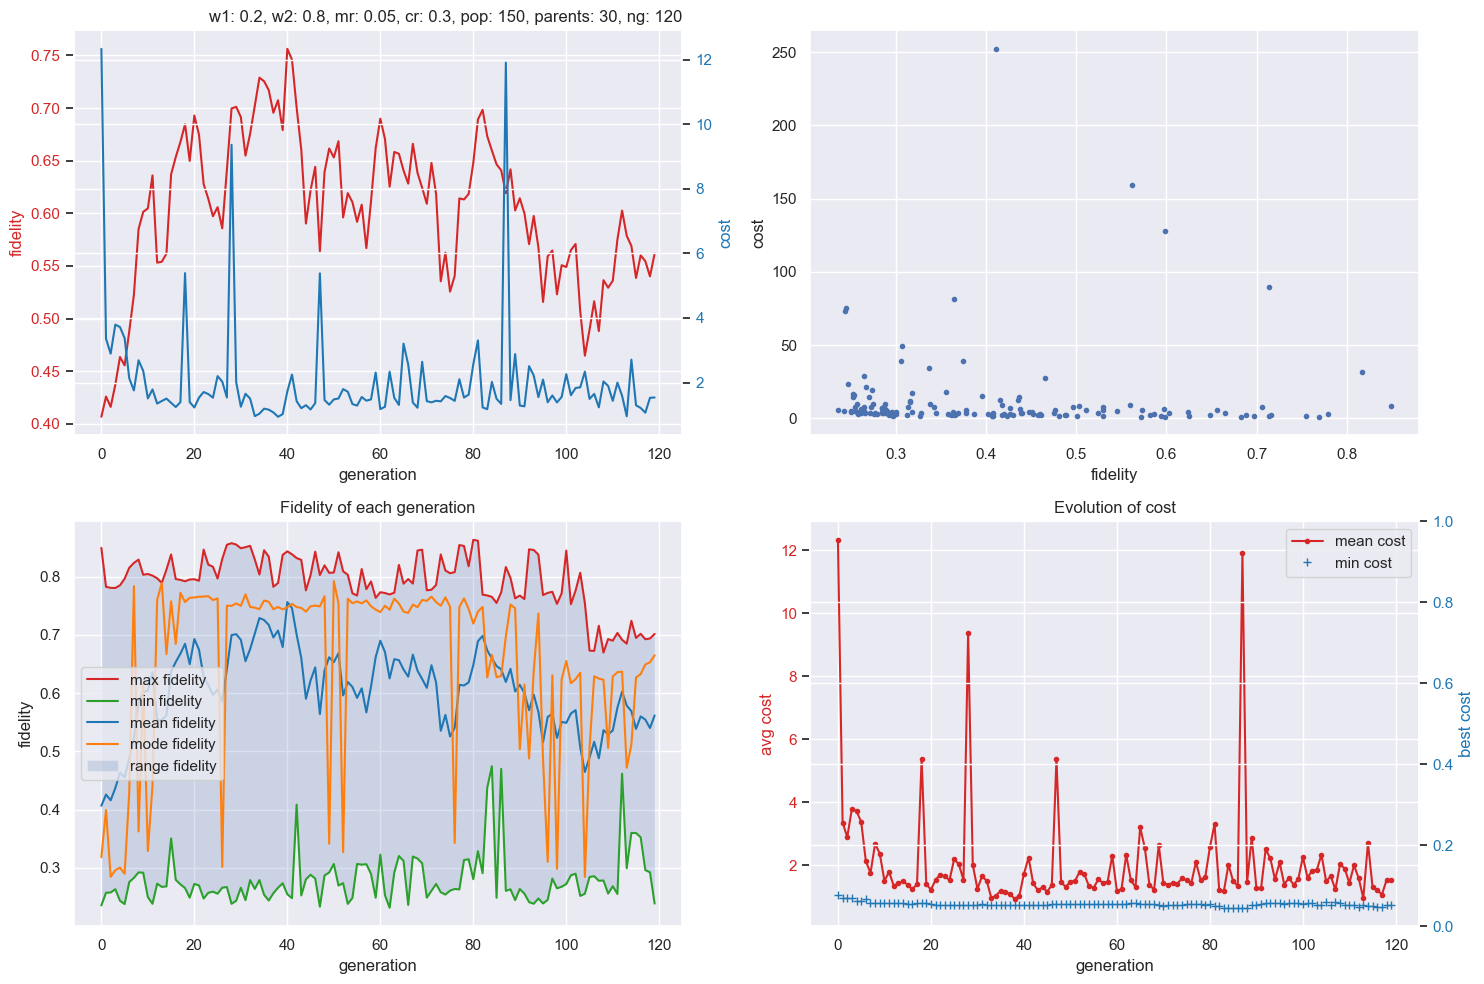

In [107]:
read_pickle(fileName='results/exp_HyperTune1.pickle', plotFC=True, plotF=True, plotC=True)

/var/folders/b7/kcj1zfy15d35hgd16vscfs0r0000gn/T/ipykernel_46545/3883819222.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  ax[1, 1].plot(x, np.mean(my_loaded_object['cost_history'], axis=1), 'r.-', label='mean cost', color=color)
/var/folders/b7/kcj1zfy15d35hgd16vscfs0r0000gn/T/ipykernel_46545/3883819222.py:82: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b+" (-> color='b'). The keyword argument will take precedence.
  ax[1, 1].plot(x, np.min(my_loaded_object['cost_history'], axis=1), 'b+',label='min cost', color=color)


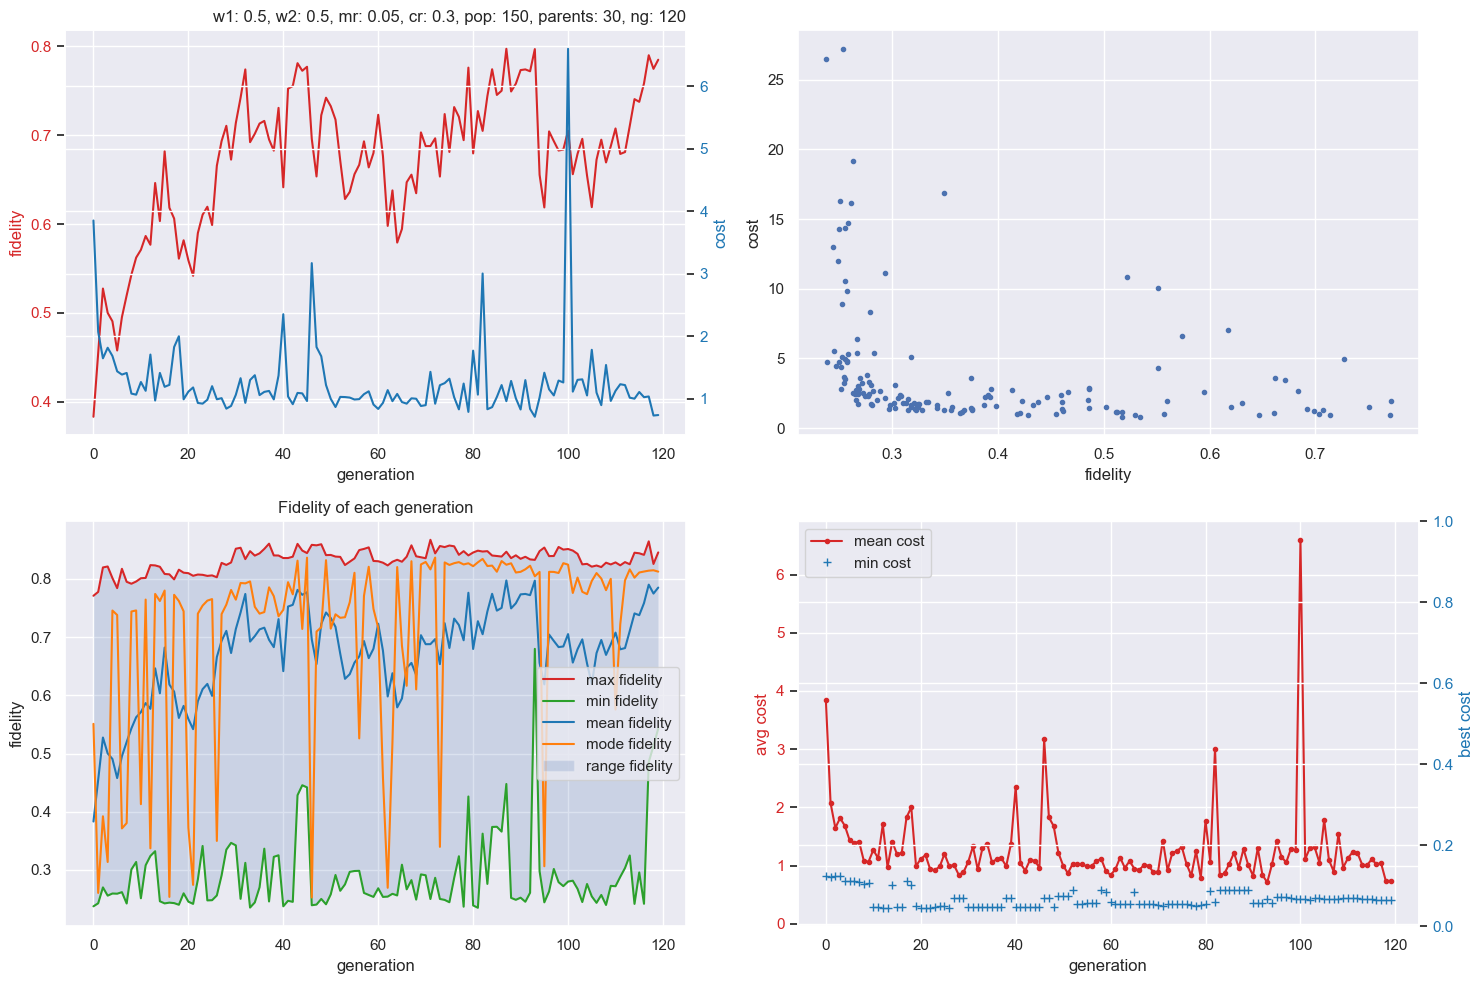

In [99]:
read_pickle(fileName='results/exp_HyperTune2.pickle', plotFC=True, plotF=True, plotC=True)

/var/folders/b7/kcj1zfy15d35hgd16vscfs0r0000gn/T/ipykernel_46545/3883819222.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  ax[1, 1].plot(x, np.mean(my_loaded_object['cost_history'], axis=1), 'r.-', label='mean cost', color=color)
/var/folders/b7/kcj1zfy15d35hgd16vscfs0r0000gn/T/ipykernel_46545/3883819222.py:82: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b+" (-> color='b'). The keyword argument will take precedence.
  ax[1, 1].plot(x, np.min(my_loaded_object['cost_history'], axis=1), 'b+',label='min cost', color=color)


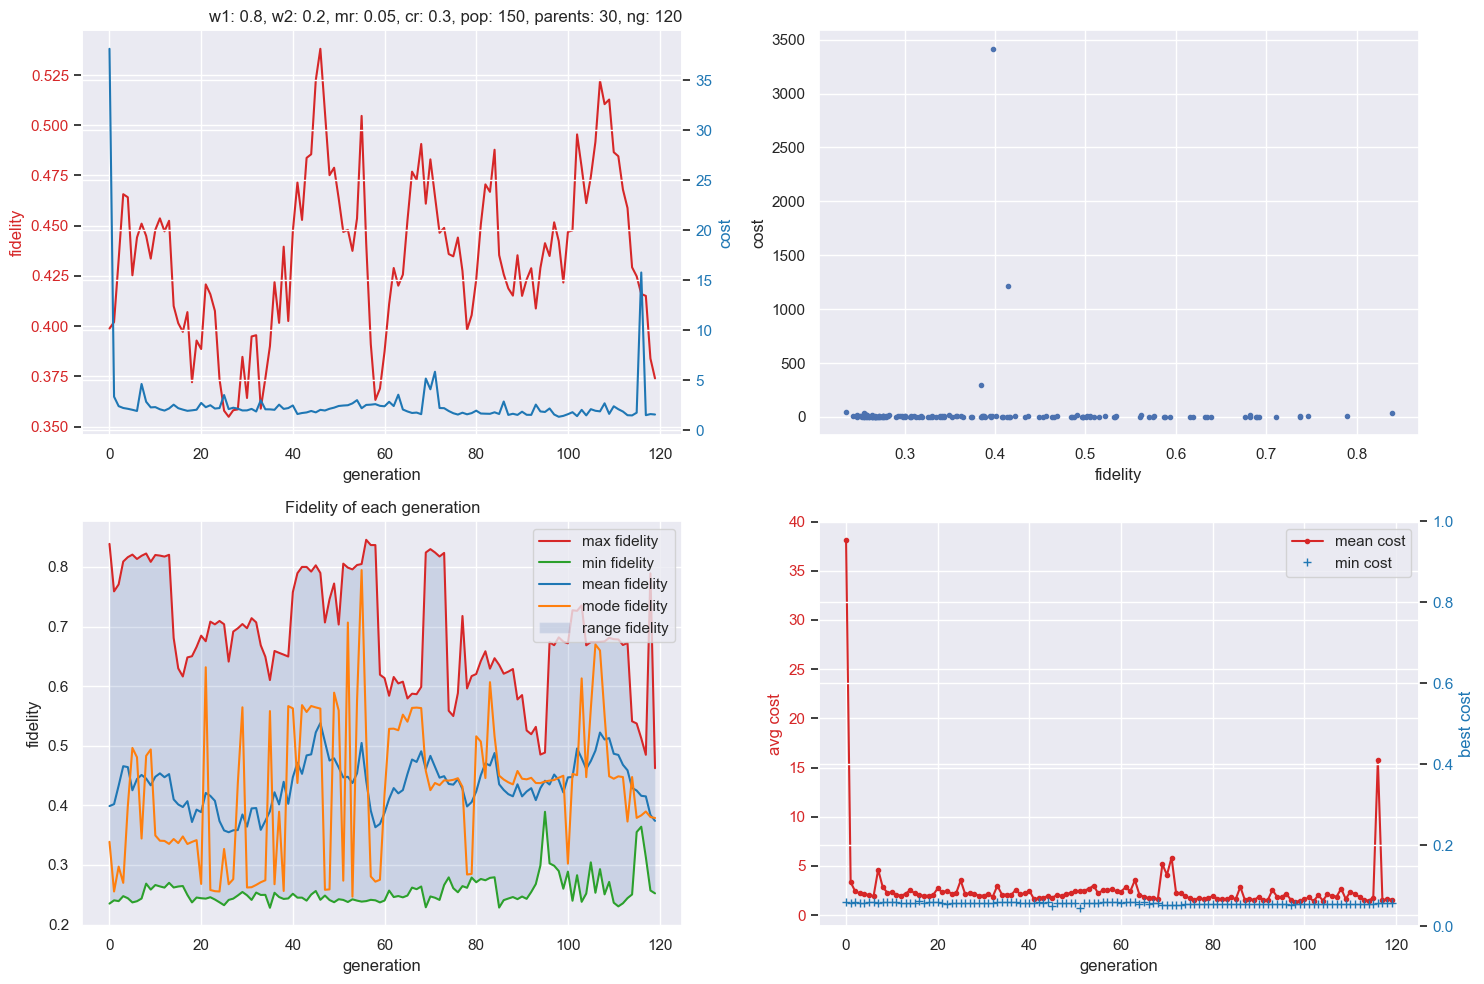

In [100]:
read_pickle(fileName='results/exp_HyperTune3.pickle', plotFC=True, plotF=True, plotC=True)

/var/folders/b7/kcj1zfy15d35hgd16vscfs0r0000gn/T/ipykernel_46545/3883819222.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  ax[1, 1].plot(x, np.mean(my_loaded_object['cost_history'], axis=1), 'r.-', label='mean cost', color=color)
/var/folders/b7/kcj1zfy15d35hgd16vscfs0r0000gn/T/ipykernel_46545/3883819222.py:82: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b+" (-> color='b'). The keyword argument will take precedence.
  ax[1, 1].plot(x, np.min(my_loaded_object['cost_history'], axis=1), 'b+',label='min cost', color=color)


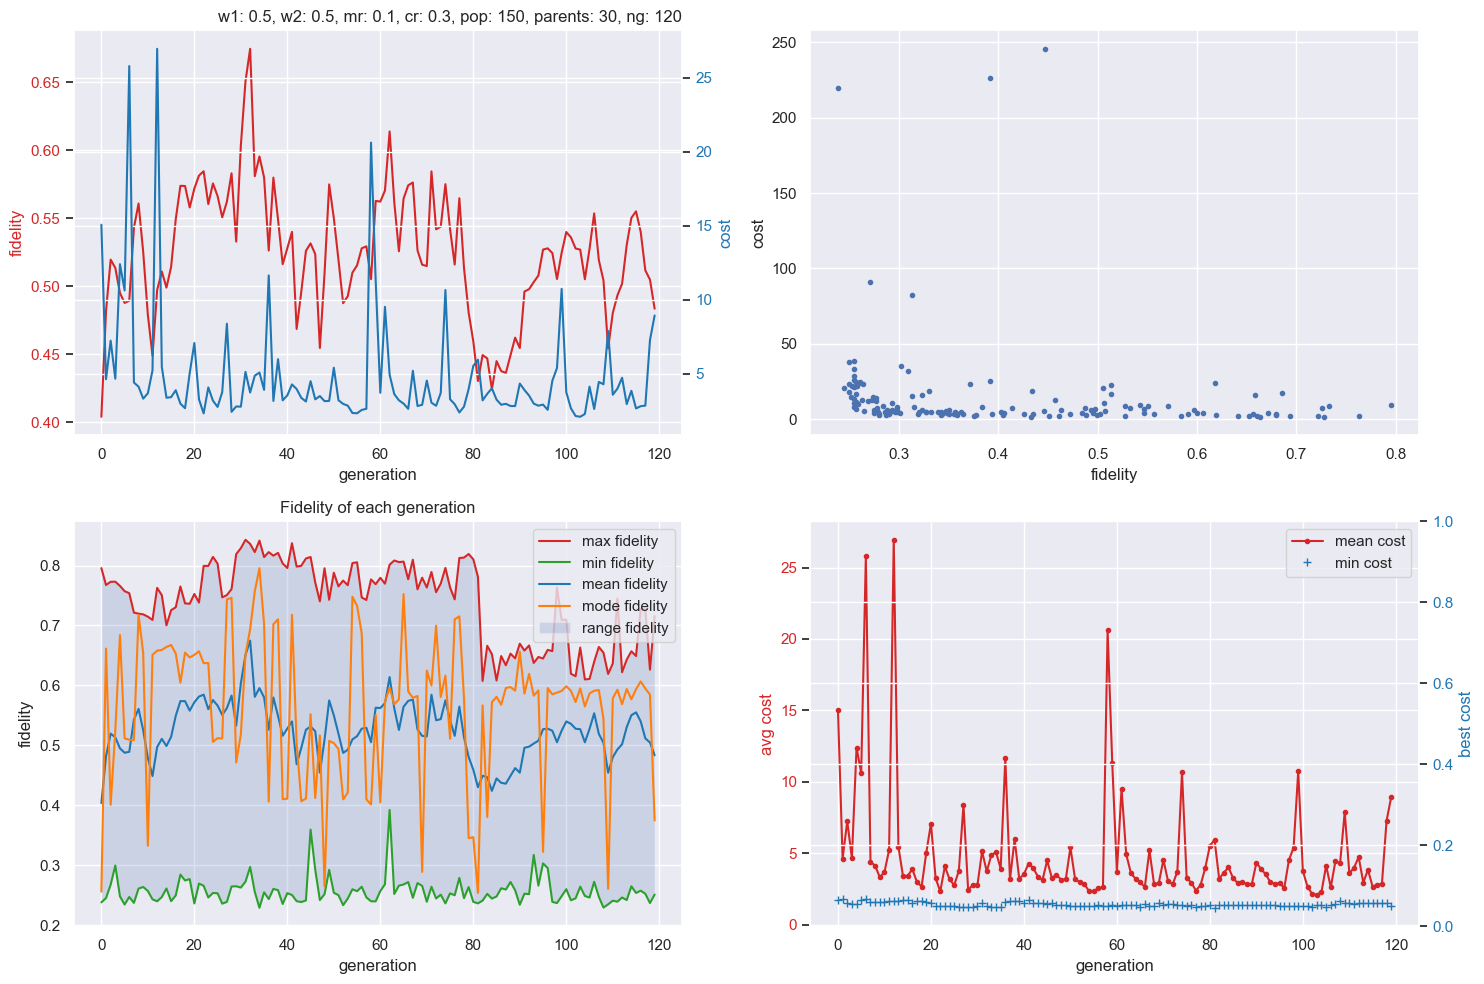

In [102]:
read_pickle(fileName='results/exp_HyperTune4.pickle', plotFC=True, plotF=True, plotC=True)

/var/folders/b7/kcj1zfy15d35hgd16vscfs0r0000gn/T/ipykernel_46545/3883819222.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  ax[1, 1].plot(x, np.mean(my_loaded_object['cost_history'], axis=1), 'r.-', label='mean cost', color=color)
/var/folders/b7/kcj1zfy15d35hgd16vscfs0r0000gn/T/ipykernel_46545/3883819222.py:82: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b+" (-> color='b'). The keyword argument will take precedence.
  ax[1, 1].plot(x, np.min(my_loaded_object['cost_history'], axis=1), 'b+',label='min cost', color=color)


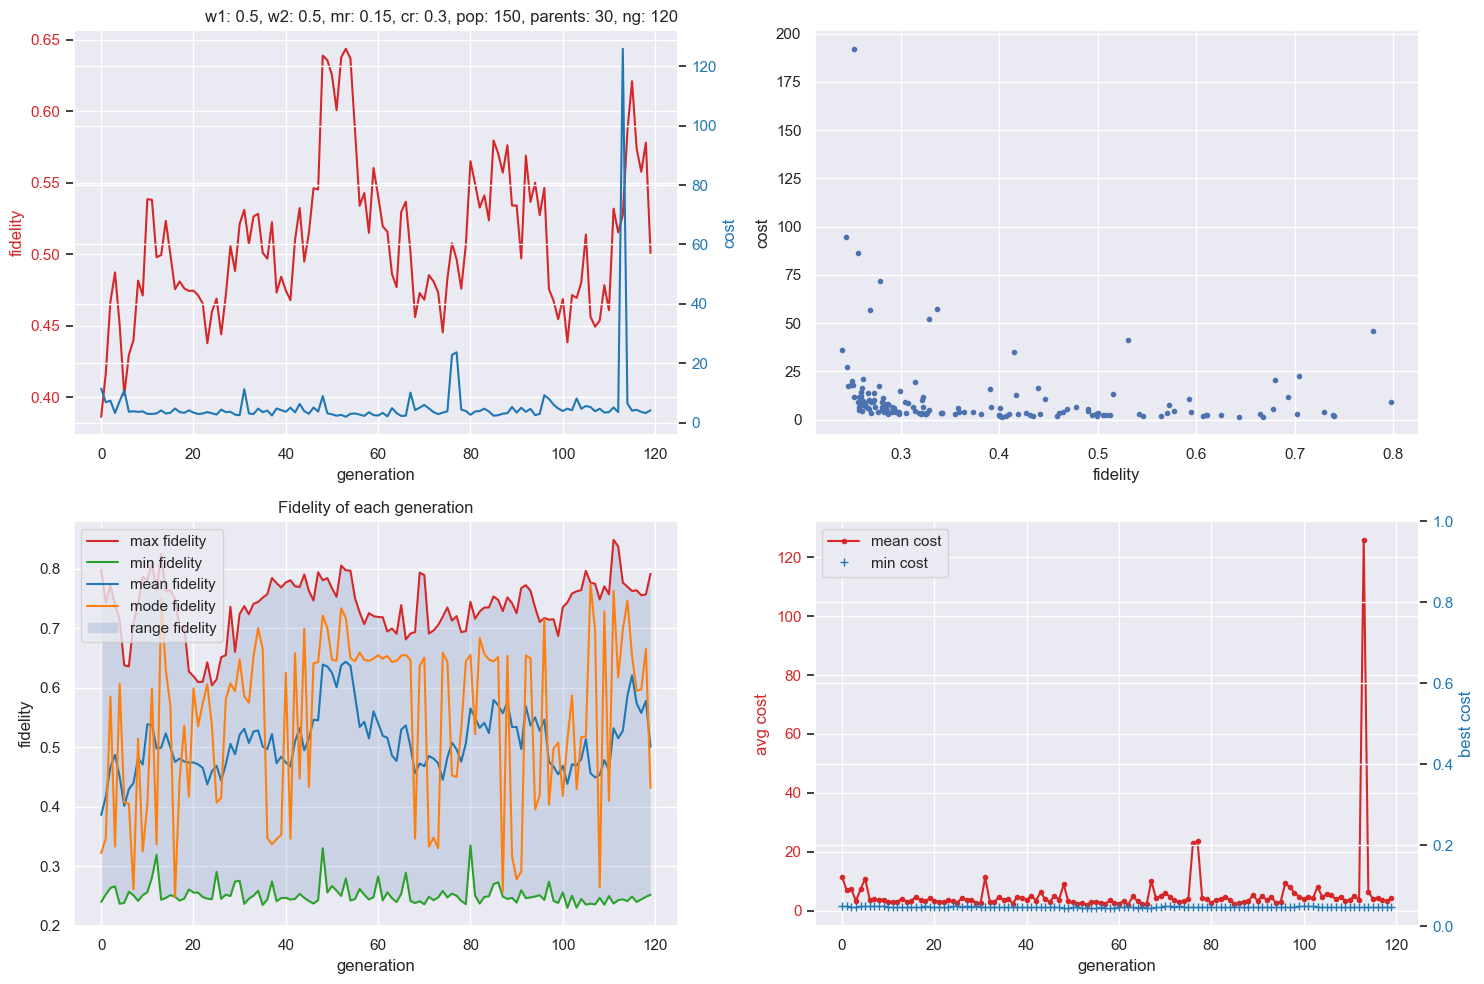

In [103]:
read_pickle(fileName='results/exp_HyperTune5.pickle', plotFC=True, plotF=True, plotC=True)

/var/folders/b7/kcj1zfy15d35hgd16vscfs0r0000gn/T/ipykernel_46545/3883819222.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  ax[1, 1].plot(x, np.mean(my_loaded_object['cost_history'], axis=1), 'r.-', label='mean cost', color=color)
/var/folders/b7/kcj1zfy15d35hgd16vscfs0r0000gn/T/ipykernel_46545/3883819222.py:82: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b+" (-> color='b'). The keyword argument will take precedence.
  ax[1, 1].plot(x, np.min(my_loaded_object['cost_history'], axis=1), 'b+',label='min cost', color=color)


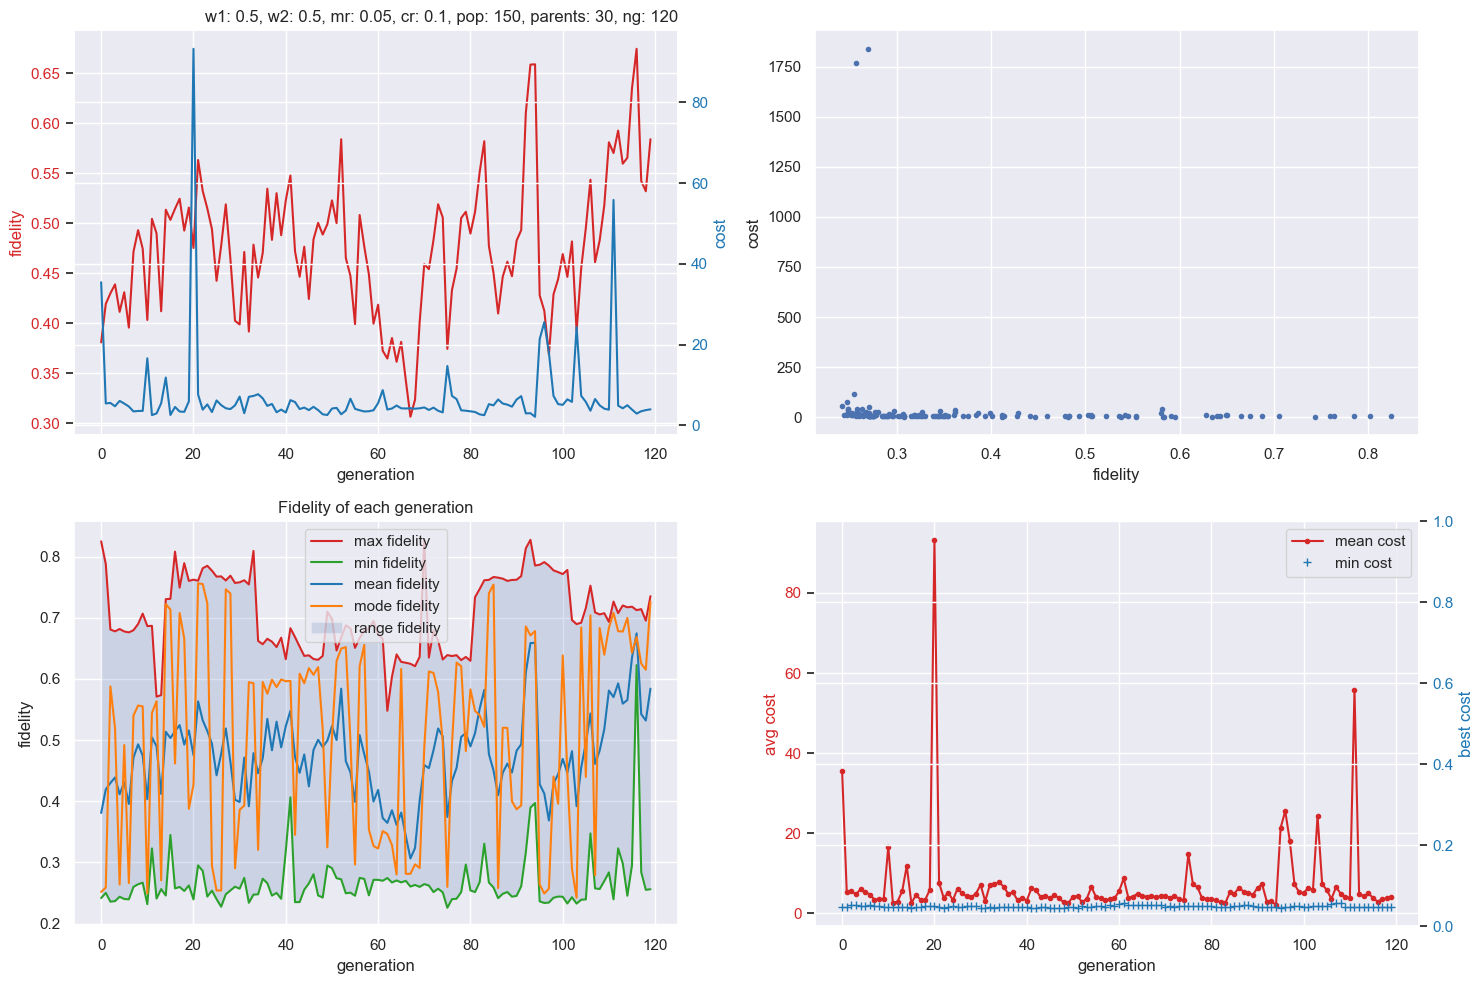

In [104]:
read_pickle(fileName='results/exp_HyperTune6.pickle', plotFC=True, plotF=True, plotC=True)

/var/folders/b7/kcj1zfy15d35hgd16vscfs0r0000gn/T/ipykernel_46545/3883819222.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  ax[1, 1].plot(x, np.mean(my_loaded_object['cost_history'], axis=1), 'r.-', label='mean cost', color=color)
/var/folders/b7/kcj1zfy15d35hgd16vscfs0r0000gn/T/ipykernel_46545/3883819222.py:82: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b+" (-> color='b'). The keyword argument will take precedence.
  ax[1, 1].plot(x, np.min(my_loaded_object['cost_history'], axis=1), 'b+',label='min cost', color=color)


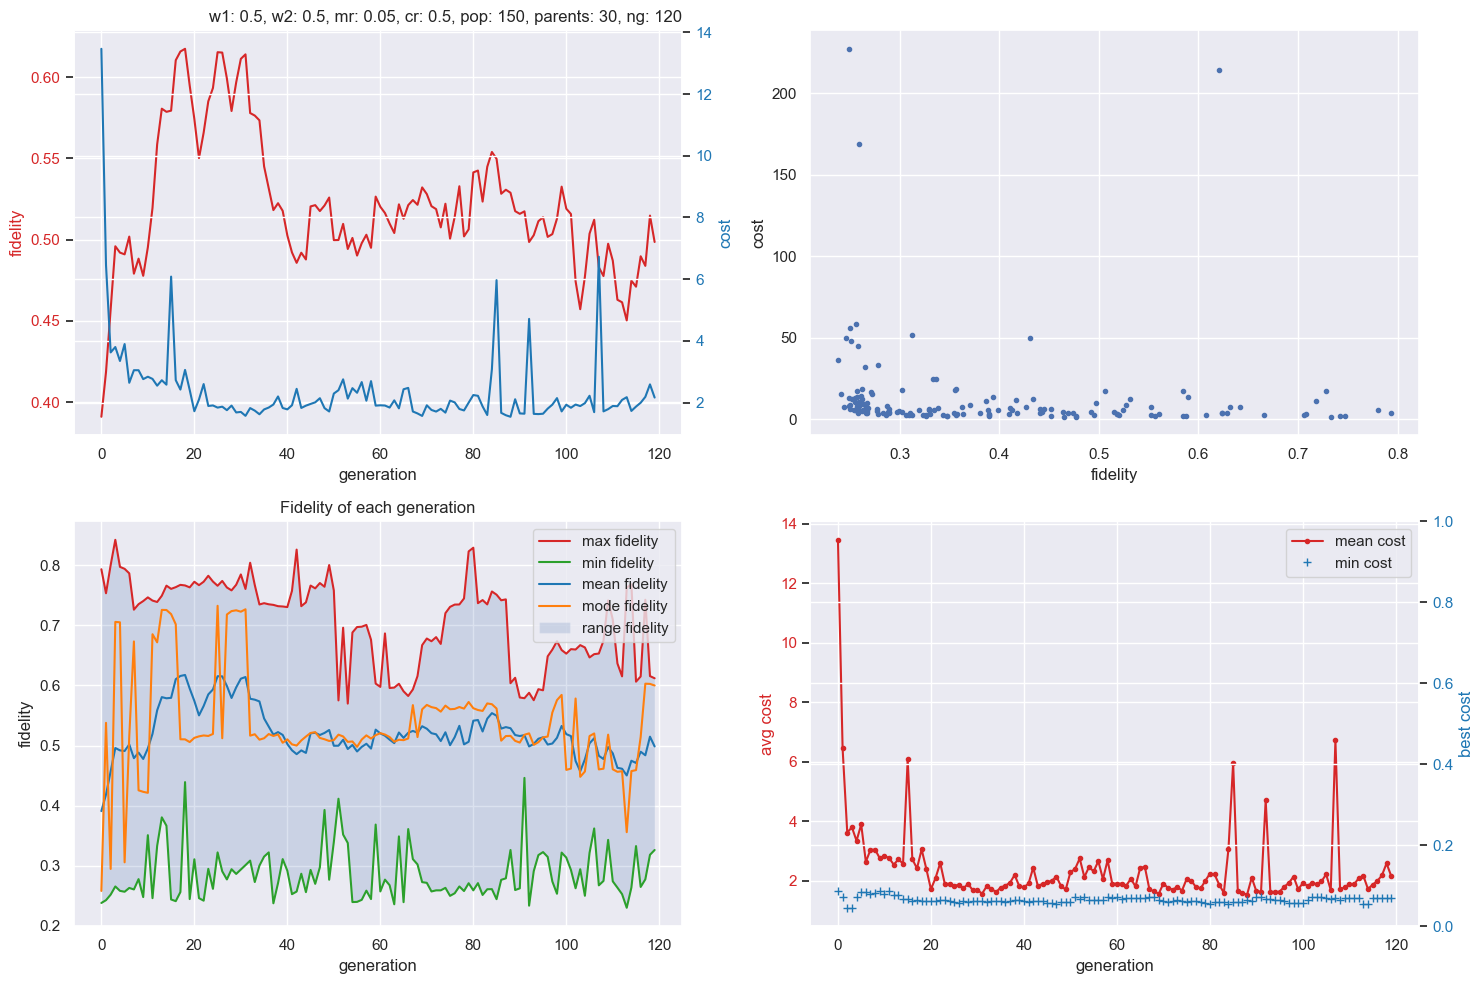

In [105]:
read_pickle(fileName='results/exp_HyperTune7.pickle', plotFC=True, plotF=True, plotC=True)

In [6]:
with open("results/fast_test.pickle", "rb") as f:
    my_loaded_object = pickle.load(f)

In [8]:
my_loaded_object['baseline_value']

[0.07784247732146687,
 0.2152677839681323,
 0.36160158210409055,
 0.796266587334194]

In [109]:
loss_list =  np.array([0.03])
p_dep_list = np.array([0.025])
gate_error_list = np.array([0, 0.0025, 0.005, 0.0075, 0.01])
mem_error_list = np.array([0.01])
measurement_error_list =  np.array([0, 0.0025, 0.005, 0.0075, 0.01])
number_of_hops_list = np.array([2, 4, 8, 16]) 
num_trajectories = 10
exp_names = ['0G', '1G-Ss-Dp', '2G-NonLocalCNOT', '1-2G-DirectedEncoded', 
             'HG-END2ENDPurifiedEncoded', '2G-NonLocalCNOT-Perfect', 
             '1-2G-DirectedEncoded-Perfect']

parameters_set = []; index = 0
for hops in number_of_hops_list:
    for loss in loss_list:
        for p_dep in p_dep_list:
            for gate_error in gate_error_list:
                for mem_error in mem_error_list:
                    for measure_error in measurement_error_list:
                        for trajectory in range(num_trajectories):
                            parameters_set.append({
                                'index': index,
                                'loss rate': loss, 
                                'depolarizing rate': p_dep, 
                                'gate error rate': gate_error, 
                                'memory error': mem_error,
                                'measurement error': measure_error,
                                'number of hops': hops,
                                'trajectory': trajectory
                                })
                        index += 1

# message_log = 'exp_id2_StrategiesAnalysisNoiseSensitivity_fixed'

# parameters_set = []; index = 0
# for hops in number_of_hops_list:
#     for loss in loss_list:
#         for p_dep in p_dep_list:
#             for gate_error in gate_error_list:
#                 for mem_error in mem_error_list:
#                     for measure_error in measurement_error_list:
#                         for exp_name in exp_names:
#                             for trajectory in range(num_trajectories):
                                
#                                 # Read file 
#                                 with open(f"result/Result_{message_log}_p{index}_r{trajectory}_{exp_name}.pkl", "rb") as f:
#                                     exp = dill.load(f)

#                                 data = {
#                                     'index': index,
#                                     'loss rate': loss, 
#                                     'depolarizing rate': p_dep, 
#                                     'gate error rate': gate_error, 
#                                     'memory error': mem_error,
#                                     'measurement error': measure_error,
#                                     'number of hops': hops,
#                                     'trajectory': trajectory,
#                                     'experiment': exp_name,
#                                     'number of hops': hops,
#                                     'fidelity': exp['fidelity'],
#                                     'total time': exp['Time used'],
#                                 }
#                                 parameters_set.append(data)
#                         index += 1

# DataFrame = pd.DataFrame(parameters_set)
# DataFrame.to_csv('exp_id2_StrategiesAnalysisNoiseSensitivity_fixed_Extracted_Data.csv', index=False)

In [119]:
df = pd.DataFrame(parameters_set)
pd.set_option('display.max_rows', 10)
df

,index,loss rate,depolarizing rate,gate error rate,memory error,measurement error,number of hops,trajectory
0,0,0.03,0.025,0.00,0.01,0.00,2,0
1,0,0.03,0.025,0.00,0.01,0.00,2,1
2,0,0.03,0.025,0.00,0.01,0.00,2,2
3,0,0.03,0.025,0.00,0.01,0.00,2,3
4,0,0.03,0.025,0.00,0.01,0.00,2,4
...,...,...,...,...,...,...,...,...
995,99,0.03,0.025,0.01,0.01,0.01,16,5
996,99,0.03,0.025,0.01,0.01,0.01,16,6
997,99,0.03,0.025,0.01,0.01,0.01,16,7
998,99,0.03,0.025,0.01,0.01,0.01,16,8
